In [2]:
import pandas as pd
import numpy as np
import unicodedata
import re
import pyarrow

In [ ]:
df = pd.read_csv('C:/Users/Utilisateur/Downloads/StockUniteLegale_utf8/StockUniteLegale_utf8.csv')


MemoryError: Unable to allocate 222. MiB for an array with shape (29095403,) and data type object

In [3]:
df.head()

,SIREN,Nom ou raison sociale de l'entreprise,Famille juridique de l'entreprise,Code postal,Libellé de la commune de l'établissement,Code du département de l'établissement,Département de l'établissement,Région de l'établissement
0,5720610,PICARDIE MARITIME HABITAT FONDATION PAUL DUCLERCQ,Coopératives,80100,ABBEVILLE,80,SOMME,HAUTS DE FRANCE
1,303040307,UNION NATIONALE DES A C,Associations,80300,MIRAUMONT,80,SOMME,HAUTS DE FRANCE
2,330275801,CUMA PORCINE GUADELOUPE,Coopératives,97122,BAIE-MAHAULT,971,GUADELOUPE,GUADELOUPE
3,339237554,ASSOCIATION CENTRE ALLEE VERTE,Associations,44230,SAINT-SEBASTIEN-SUR-LOIRE,44,LOIRE ATLANTIQUE,PAYS DE LA LOIRE
4,379422934,STRASBOURG PROMOTION EVENEMENTS,Associations,67000,STRASBOURG,67,BAS RHIN,GRAND EST


In [4]:
len(df)

1130252

In [5]:

def clean_col_name(col):
    if not isinstance(col, str):
        col = str(col)
    # Remplace '->' par un espace (pour séparer), puis strip()
    col = col.replace('->', ' ')
    col = col.strip()
    # Enlève les accents
    col = unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('ascii')
    # Minuscule
    col = col.lower()
    # Remplace tout groupe d'espaces par un underscore
    col = re.sub(r'\s+', '_', col)
    # Supprime caractères non alphanumériques à l'exception de '_'
    col = re.sub(r'[^0-9a-z_]', '', col)
    # Remplace plusieurs '_' par un seul
    col = re.sub(r'_+', '_', col)
    # Enlève '_' en début/fin
    col = col.strip('_')
    return col

def deduplicate_columns(cols):
    seen = {}
    out = []
    for c in cols:
        if c in seen:
            seen[c] += 1
            out.append(f"{c}_{seen[c]}")
        else:
            seen[c] = 0
            out.append(c)
    return out



In [6]:
# Usage :
new_cols = [clean_col_name(c) for c in df.columns]
new_cols = deduplicate_columns(new_cols)
df.columns = new_cols

# Afficher résultat rapide
print(df.columns.tolist())

['siren', 'nom_ou_raison_sociale_de_lentreprise', 'famille_juridique_de_lentreprise', 'code_postal', 'libelle_de_la_commune_de_letablissement', 'code_du_departement_de_letablissement', 'departement_de_letablissement', 'region_de_letablissement']


In [7]:
df.columns

Index(['siren', 'nom_ou_raison_sociale_de_lentreprise',
       'famille_juridique_de_lentreprise', 'code_postal',
       'libelle_de_la_commune_de_letablissement',
       'code_du_departement_de_letablissement',
       'departement_de_letablissement', 'region_de_letablissement'],
      dtype='object')

In [8]:
df.head()

,siren,nom_ou_raison_sociale_de_lentreprise,famille_juridique_de_lentreprise,code_postal,libelle_de_la_commune_de_letablissement,code_du_departement_de_letablissement,departement_de_letablissement,region_de_letablissement
0,5720610,PICARDIE MARITIME HABITAT FONDATION PAUL DUCLERCQ,Coopératives,80100,ABBEVILLE,80,SOMME,HAUTS DE FRANCE
1,303040307,UNION NATIONALE DES A C,Associations,80300,MIRAUMONT,80,SOMME,HAUTS DE FRANCE
2,330275801,CUMA PORCINE GUADELOUPE,Coopératives,97122,BAIE-MAHAULT,971,GUADELOUPE,GUADELOUPE
3,339237554,ASSOCIATION CENTRE ALLEE VERTE,Associations,44230,SAINT-SEBASTIEN-SUR-LOIRE,44,LOIRE ATLANTIQUE,PAYS DE LA LOIRE
4,379422934,STRASBOURG PROMOTION EVENEMENTS,Associations,67000,STRASBOURG,67,BAS RHIN,GRAND EST


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130252 entries, 0 to 1130251
Data columns (total 8 columns):
 #   Column                                   Non-Null Count    Dtype 
---  ------                                   --------------    ----- 
 0   siren                                    1130252 non-null  int64 
 1   nom_ou_raison_sociale_de_lentreprise     1130251 non-null  object
 2   famille_juridique_de_lentreprise         1130030 non-null  object
 3   code_postal                              1130134 non-null  object
 4   libelle_de_la_commune_de_letablissement  1130134 non-null  object
 5   code_du_departement_de_letablissement    1128547 non-null  object
 6   departement_de_letablissement            1128547 non-null  object
 7   region_de_letablissement                 1128547 non-null  object
dtypes: int64(1), object(7)
memory usage: 69.0+ MB


In [10]:
df.describe(include='all')

,siren,nom_ou_raison_sociale_de_lentreprise,famille_juridique_de_lentreprise,code_postal,libelle_de_la_commune_de_letablissement,code_du_departement_de_letablissement,departement_de_letablissement,region_de_letablissement
count,1.130252e+06,1130251,1130030,1130134.0,1130134,1128547,1128547,1128547
unique,NaN,1046518,4,12395.0,30861,101,101,18
top,NaN,COMITE DES FETES,Associations,75018.0,TOULOUSE,75,PARIS,ILE DE FRANCE
freq,NaN,2966,1097041,4523.0,11376,72999,72999,190626
mean,6.391782e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.065845e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.580113e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.422659e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.375739e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.294469e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum().sort_values(ascending=False)

code_du_departement_de_letablissement      1705
departement_de_letablissement              1705
region_de_letablissement                   1705
famille_juridique_de_lentreprise            222
code_postal                                 118
libelle_de_la_commune_de_letablissement     118
nom_ou_raison_sociale_de_lentreprise          1
siren                                         0
dtype: int64

In [12]:
df.nunique().sort_values(ascending=False)

siren                                      1130252
nom_ou_raison_sociale_de_lentreprise       1046518
libelle_de_la_commune_de_letablissement      30861
code_postal                                  12395
code_du_departement_de_letablissement          101
departement_de_letablissement                  101
region_de_letablissement                        18
famille_juridique_de_lentreprise                 4
dtype: int64

In [13]:

nunique = df.nunique()
missing = df.isna().sum()
summary = pd.DataFrame({
    'nunique': nunique,
    'missing': missing,
    'missing_pct': (missing / len(df) * 100).round(2)
})

# Trier par nunique croissant 
summary = summary.sort_values('nunique', ascending=True)
summary

,nunique,missing,missing_pct
famille_juridique_de_lentreprise,4,222,0.02
region_de_letablissement,18,1705,0.15
code_du_departement_de_letablissement,101,1705,0.15
departement_de_letablissement,101,1705,0.15
code_postal,12395,118,0.01
libelle_de_la_commune_de_letablissement,30861,118,0.01
nom_ou_raison_sociale_de_lentreprise,1046518,1,0.00
siren,1130252,0,0.00


In [14]:
mots_cles = [
    'NUMERIQUE', 'DIGITAL', 'INFORMATIQUE', 'LOGICIEL', 'SOFTWARE', 
    'WEB', 'TECH', 'DATA', 'RESEAU', 'SYSTEME', 'PLATEFORME', 
    'APPLICATION', 'DEVELOPPEMENT', 'CLOUD', 'CYBER', 'INTELLIGENCE ARTIFICIELLE'
]
df['nom_propre'] = df['nom_ou_raison_sociale_de_lentreprise'].astype(str).str.upper()
pattern = '|'.join(mots_cles)

df_ess_num_nom = df[df['nom_propre'].str.contains(pattern, na=False)].copy()

print(f"Nombre de structures ESS avec un nom 'numérique' : {len(df_ess_num_nom)}")


Nombre de structures ESS avec un nom 'numérique' : 18551


Top des régions ESS
ILE DE FRANCE                 16.891277
AUVERGNE RHONE ALPES          12.263468
OCCITANIE                     11.190584
NOUVELLE AQUITAINE             9.776022
PROVENCE ALPES COTE D AZUR     8.955143
HAUTS DE FRANCE                6.988810
GRAND EST                      6.442089
PAYS DE LA LOIRE               5.562374
BRETAGNE                       5.049059
BOURGOGNE FRANCHE COMTE        4.138950
Name: region_de_letablissement, dtype: float64


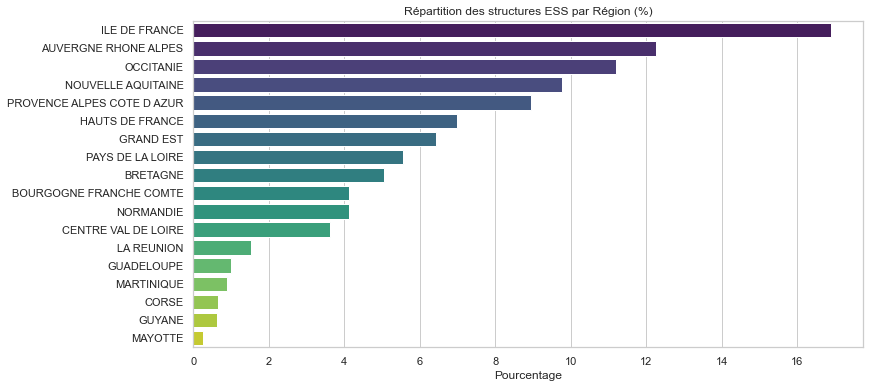


Quel type de structures?


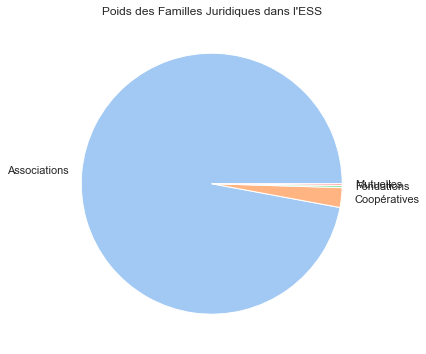

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# ajout du 0 manquant pour les départements < 10
df['code_postal'] = df['code_postal'].astype(str).str.split('.').str[0].str.zfill(5)

df_clean = df.dropna(subset=['region_de_letablissement', 'departement_de_letablissement']).copy()

print("Top des régions ESS")
region_dist = df_clean['region_de_letablissement'].value_counts(normalize=True) * 100
print(region_dist.head(10))

plt.figure()
sns.barplot(x=region_dist.values, y=region_dist.index, palette='viridis')
plt.title('Répartition des structures ESS par Région (%)')
plt.xlabel('Pourcentage')
plt.show()

print("\nQuel type de structures?")
type_dist = df_clean['famille_juridique_de_lentreprise'].value_counts()
plt.figure()
plt.pie(type_dist, labels=type_dist.index, colors=sns.color_palette('pastel'))
plt.title('Poids des Familles Juridiques dans l\'ESS')
plt.show()

In [ ]:


mots_cles = [
    'NUMERIQUE', 'DIGITAL', 'INFORMATIQUE', 'LOGICIEL', 'SOFTWARE', 
    'WEB', 'TECH', 'DATA', 'RESEAU', 'SYSTEME', 'PLATEFORME', 
    'APPLICATION', 'DEVELOPPEMENT', 'CLOUD', 'CYBER', 'INTELLIGENCE ARTIFICIELLE'
]
pattern = '|'.join(mots_cles)
#Lorsque vous l'utilisez ensuite dans .str.contains(pattern), Pandas ne cherche pas la phrase entière, mais vérifie si au moins l'un des mots de la liste est présent dans le nom de l'entreprise.
# Création d'un flag booléen pour le numérique
df_clean['is_num'] = df_clean['nom_ou_raison_sociale_de_lentreprise'].str.upper().str.contains(pattern, na=False)

#Quel pourcentage de l'ESS est "identifié" numérique par nom ?
num_pct = df_clean.groupby('region_de_letablissement')['is_num'].mean().sort_values(ascending=False) * 100

print("\nRégions avec le plus de structures ESS numriques")
print(num_pct.head(5))


Régions avec le plus de structures numriques
region_de_letablissement
MAYOTTE          3.097935
ILE DE FRANCE    2.709494
LA REUNION       2.556900
MARTINIQUE       2.551071
GUADELOUPE       2.278548
Name: is_num, dtype: float64
